In [1]:
import numpy as np   
import matplotlib.pyplot as plot
import pyclouds

%matplotlib inline

In [2]:
pyclouds.__version__

'v0.2.0+1.gee1eeb6.dirty'

# Ambient state

In [3]:
from pyclouds.reference.atmos import stratification_profiles, saturation_calculation

ambient_stratification = stratification_profiles.Soong1973Dry()

T_e = lambda z: ambient_stratification.temp(z)
p_e = ambient_stratification.p

# Model integration

In [4]:
from pyclouds.models import parcel as parcel_models, microphysics as microphysics_models
#cloud_equations, plotting, cloud_microphysics
from pyclouds import Var

In [5]:
g = ambient_stratification.g
R_d = ambient_stratification.gas_properties.R()
cp_d = ambient_stratification.gas_properties.cp()

environment = ambient_stratification
constants = {'R_d': R_d, 'cp_d': cp_d, 'g': g }

In [6]:
z0 = 750.
z_points = np.linspace(z0, 10e3, 5000)

w0 = 2.0
r0 = 100.
T0 = ambient_stratification.temp(z0) + 0.1
p0 = ambient_stratification.p(z0)
# r, w, T, q_v, q_r, q_l, q_i
initial_condition = Var.make_state(r=r0, w=w0, T=T0, q_v=0.012, q_l=0.0, q_i=0.0, p=p0)

In [7]:
profiles = []

microphysics = microphysics_models.FiniteCondensationTimeMicrophysics(model_constraint='isobaric')
beta = 0.2
cloud_model = parcel_models.FullThermodynamicsCloudEquations(environment=environment, gamma=1.0, C_D=0.1, beta=beta, microphysics=microphysics)
p = cloud_model.integrate(initial_condition, z_points)
profiles.append(p)

microphysics = microphysics_models.FiniteCondensationTimeMicrophysics(model_constraint='isobaric')
beta = 0.1
cloud_model = parcel_models.FullThermodynamicsCloudEquations(environment=environment, gamma=1.0, C_D=0.1, beta=beta, microphysics=microphysics)
p = cloud_model.integrate(initial_condition, z_points)
profiles.append(p)


/home/earlcd/pytools/pyclouds/models/parcel.py:610: UserWarning: It seems the environmental profile doesn't define a relative humidity so we'll assume it's dry
  "It seems the environmental profile doesn't define a relative humidity so we'll assume it's dry"
/home/earlcd/pytools/pyclouds/models/microphysics.py:272: UserWarning: EoS calculation stored within microphysics, should really use something defined externally
  "EoS calculation stored within microphysics, should really use something defined externally"
/home/earlcd/pytools/pyclouds/models/microphysics.py:424: RuntimeWarning: divide by zero encountered in double_scalars
  lambda_r = (pi * (qg * rho_l) / (qr * rho_g) * N0r) ** (1.0 / 4.0)
/home/earlcd/pytools/pyclouds/models/parcel.py:566: RuntimeWarning: divide by zero encountered in double_scalars
  l = (8.0 * rho_l * pi * N0 / (q_r * rho_c)) ** 0.25
/home/earlcd/pytools/pyclouds/models/microphysics.py:424: RuntimeWarning: invalid value encountered in double_scalars
  lambda_r 

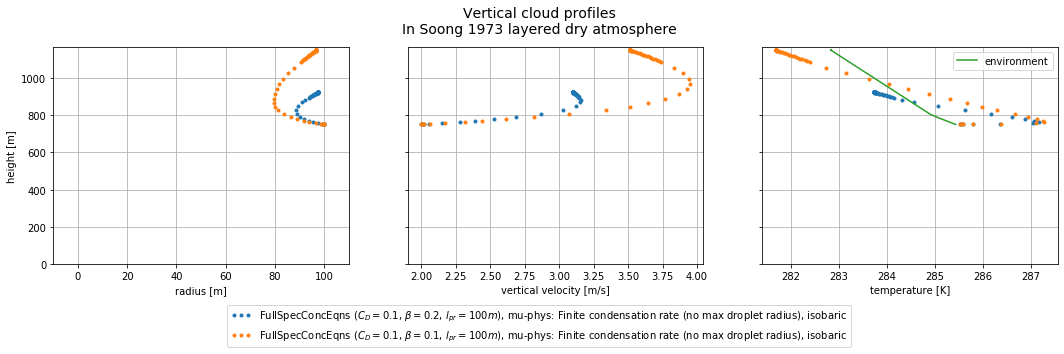

In [8]:
fig = pyclouds.plot.parcel.plot_profiles(profiles, ['r', 'w', 'T'])
#fig.savefig('/home/zmaw/m300464/Desktop/cloudmodel_profile.pdf')

In [9]:
# OBS: saving of variables from microphysics integration is disabled for now

In [10]:
# fig = pyclouds.plot.parcel.plot_profiles(profiles, ['q_l', 'q_v', 'q_r', 'r_c', 'Nc', 'rho_c', 'Sw', ])
# fig.gca().set_xlim(-1,1)

In [11]:
# t_mphys = profile1.extra_vars['t_substeps']
# r_c__mphys = profile1.extra_vars['r_c']
# plot.plot(r_c__mphys)
# plot.ylim(0, 2.0e-5)

In [12]:
# Nc__mphys = profile1.extra_vars['Nc']
# plot.plot(Nc__mphys)